<a href="https://colab.research.google.com/github/pksj/IIITA_2nd_SEM/blob/main/MIT2020024_SC_Assignment_4_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

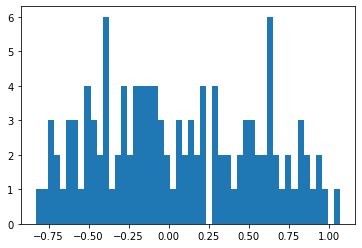

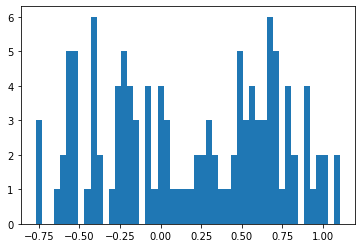

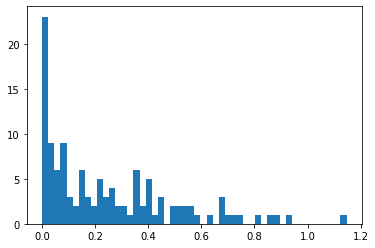

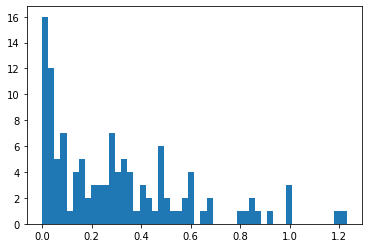

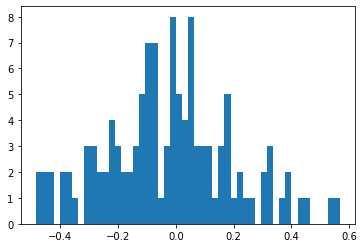

In [ ]:
import numpy as np
import matplotlib.pyplot as plt



chip_data =  np.genfromtxt('/content/Data-set-for-microchip-quality-Assurance-2019.csv',delimiter=',')


#Adding new features 
chip_data = np.array([(sample[0], sample[1], sample[0]**2, sample[1]**2, sample[0]*sample[1], sample[2]) for sample in chip_data])


#shuffling of data
np.random.shuffle(chip_data)

m= int(len(chip_data) * 0.7)

#data spiliting

x_train = chip_data[:m,:-1]
y_train = chip_data[:m,-1:]
x_test = chip_data[m:,:-1]
y_test = chip_data[m:,-1:]


plt.hist(chip_data[:,0:1], bins = 50)
plt.show()

plt.hist(chip_data[:,1:2], bins = 50)
plt.show()

plt.hist(chip_data[:,2:3], bins = 50)
plt.show()

plt.hist(chip_data[:,3:4], bins = 50)
plt.show()

plt.hist(chip_data[:,4:5], bins = 50)
plt.show()

In [ ]:
phi = y_train.mean()
# print(phi)

def mu_0(x_train, y_train):

    m = len(x_train)

    numerator =  [x for x,y in zip(x_train, y_train) if y == 0 ]

    denominator = len(numerator)

    numerator = np.sum(numerator,axis = 0)
   
    return (numerator / denominator)


mu_0 = mu_0(x_train, y_train)
# print(mu_0)



def mu_1(x_train, y_train):

    m = len(x_train)

    numerator =  [x for x,y in zip(x_train, y_train) if y == 1 ]

    denominator = len(numerator)

    numerator = np.sum(numerator,axis = 0)

    return  (numerator / denominator)


mu_1 = mu_1(x_train, y_train)
print(mu_1)


def sigma(x_train, y_train, mu_0, mu_1):

    m = len(x_train)
    n = len(x_train[0])
   
    sigma_sum = []

    for x, y in zip(x_train, y_train):

        temp = []

        if( y == 0):

            temp = (x - mu_0).reshape(n,1)
            temp = np.matmul(temp, temp.T)

        else:

            temp = (x - mu_1).reshape(n,1)
            temp = np.matmul(temp, temp.T)

        sigma_sum.append(temp)

    sigma_sum = sum(np.array(sigma_sum))
    
    return (1 / m) * (sigma_sum)

sigma = sigma(x_train, y_train, mu_0, mu_1)

# print(sigma)



[ 0.00106921  0.18873502  0.14040628  0.23674338 -0.05763305]


In [ ]:
def GDA(x_data, mu, sigma):
       
        n = sigma.shape[0]
        
        sigma_determinant = np.linalg.det(sigma)
        # print(sigma_determinant.shape)
        sigma_inverse = np.linalg.inv(sigma)
        # print(sigma_inverse.shape)

        x_minus_mu = (x_data - mu)
        x_minus_mu = x_minus_mu.reshape(*(x_minus_mu.shape), 1)
        # print(x_minus_mu.shape)

        t1 =  np.matmul(x_minus_mu.T,sigma_inverse)
        # print("t1 =" ,t1.shape)
        t2 = np.matmul(t1,x_minus_mu)
        # print("t2 =" ,t2.shape)

        temp2 = np.exp(-0.5 * t2)
        temp1 = (((2 * np.pi) ** (n/2)) * ((np.abs(sigma_determinant))**0.5))
        # print(temp1)
        # print(temp2)
        # Probability Density
        p = (1.0 / temp1) * temp2
        p = np.squeeze(p)
        # print(p)        

        return p


predicted = []


for x ,y in zip( x_test, y_test):

    n = GDA(x, mu_0, sigma) 
    p = GDA(x, mu_1, sigma) 

    if(p >= n):
        predicted.append(1)
    else:
        predicted.append(0)

print("Accuracy = ",*sum([ x == y for x,y in zip(y_test,predicted)]) / len(y_test) * 100,"%")        



Accuracy =  75.0 %
